In [1]:
import os
import datetime

import IPython
import IPython.display
import matplotlib as mpl
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
import tensorflow as tf
from tensorflow.keras import optimizers


In [2]:
def make_dataset(data, window_size):
    dataset = []
    for i in range(len(data) - window_size):
        dataset.append(np.array(data.iloc[i:i+window_size+1]))
    return np.array(dataset)

In [3]:
def error_rate(label, prediction, ft_len, forecast_len):
    error_avg = 0
    ft_len = ft_len-1
    for i in range(forecast_len):
        error = abs((label[ft_len+i,0,0] - prediction[ft_len+i])/label[ft_len+i,0,0] * 100)
        print('num',i,error,'actual',label[ft_len+i,0,0],'prediction',prediction[ft_len+i])
        error_avg = error_avg + error
    error_avg = error_avg/forecast_len
    return error_avg

In [4]:
forecasting = 20
window_size = 19

In [7]:
df = pd.read_csv('trainset/J0003_0024_0222_20110307012737_cell_1.csv', encoding='utf8')
df

,MeasuredDate,CellNo,Resistance,Volt,Temp
0,2011.3.7 6:27,1,0.259,2.23,-20
1,2011.3.7 18:29,1,0.260,2.23,-20
2,2011.3.8 6:29,1,0.259,2.23,-20
3,2011.3.8 18:29,1,0.259,2.23,-20
4,2011.3.9 6:29,1,0.259,2.23,-20
...,...,...,...,...,...
254,2011.8.30 5:28,1,0.301,2.23,-20
255,2011.8.30 17:28,1,0.301,2.23,-20
256,2011.8.31 5:28,1,0.302,2.23,-20
257,2011.8.31 16:09,1,0.300,2.23,-20


In [8]:
df = df.loc[:,['Resistance', 'Volt', 'Temp']]
df

,Resistance,Volt,Temp
0,0.259,2.23,-20
1,0.260,2.23,-20
2,0.259,2.23,-20
3,0.259,2.23,-20
4,0.259,2.23,-20
...,...,...,...
254,0.301,2.23,-20
255,0.301,2.23,-20
256,0.302,2.23,-20
257,0.300,2.23,-20


<AxesSubplot:>

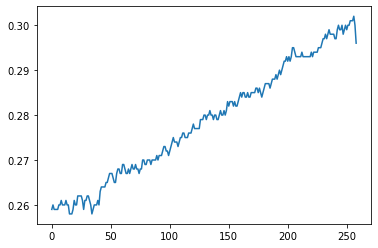

In [9]:
df['Resistance'].plot()

In [10]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
scale_cols = ['Resistance', 'Volt', 'Temp']
df_scaled = scaler.fit_transform(df)

#df_scaled = pd.DataFrame(df_scaled)
#df_scaled.columns = scale_cols

df_scaled

array([[0.02272727, 0.        , 0.        ],
       [0.04545455, 0.        , 0.        ],
       [0.02272727, 0.        , 0.        ],
       [0.02272727, 0.        , 0.        ],
       [0.02272727, 0.        , 0.        ],
       [0.02272727, 0.        , 0.        ],
       [0.04545455, 0.        , 0.        ],
       [0.04545455, 0.        , 0.        ],
       [0.06818182, 0.        , 0.        ],
       [0.04545455, 0.        , 0.        ],
       [0.04545455, 0.        , 0.        ],
       [0.04545455, 0.        , 0.        ],
       [0.06818182, 0.        , 0.        ],
       [0.04545455, 0.        , 0.        ],
       [0.04545455, 0.        , 0.        ],
       [0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        ],
       [0.02272727, 0.        , 0.        ],
       [0.06818182, 0.        , 0.        ],
       [0.04545455, 0.        , 0.        ],
       [0.04545455, 0.        , 0.        ],
       [0.

In [11]:
df_scaled = pd.DataFrame(df_scaled)
df_scaled.columns = ['Resistance', 'Volt', 'Temp']

In [12]:
df_scaled

,Resistance,Volt,Temp
0,0.022727,0.0,0.0
1,0.045455,0.0,0.0
2,0.022727,0.0,0.0
3,0.022727,0.0,0.0
4,0.022727,0.0,0.0
...,...,...,...
254,0.977273,0.0,0.0
255,0.977273,0.0,0.0
256,1.000000,0.0,0.0
257,0.954545,0.0,0.0


In [13]:
df_scaled_train = df_scaled.loc[:200,]
df_scaled_test = df_scaled.loc[200:,]

df_scaled_train

,Resistance,Volt,Temp
0,0.022727,0.0,0.0
1,0.045455,0.0,0.0
2,0.022727,0.0,0.0
3,0.022727,0.0,0.0
4,0.022727,0.0,0.0
...,...,...,...
196,0.750000,0.0,0.0
197,0.772727,0.0,0.0
198,0.772727,0.0,0.0
199,0.795455,0.0,0.0


In [14]:
ds_train = make_dataset(df_scaled_train,window_size)
ds_train

array([[[0.02272727, 0.        , 0.        ],
        [0.04545455, 0.        , 0.        ],
        [0.02272727, 0.        , 0.        ],
        ...,
        [0.        , 0.        , 0.        ],
        [0.02272727, 0.        , 0.        ],
        [0.06818182, 0.        , 0.        ]],

       [[0.04545455, 0.        , 0.        ],
        [0.02272727, 0.        , 0.        ],
        [0.02272727, 0.        , 0.        ],
        ...,
        [0.02272727, 0.        , 0.        ],
        [0.06818182, 0.        , 0.        ],
        [0.04545455, 0.        , 0.        ]],

       [[0.02272727, 0.        , 0.        ],
        [0.02272727, 0.        , 0.        ],
        [0.02272727, 0.        , 0.        ],
        ...,
        [0.06818182, 0.        , 0.        ],
        [0.04545455, 0.        , 0.        ],
        [0.04545455, 0.        , 0.        ]],

       ...,

       [[0.61363636, 0.        , 0.        ],
        [0.63636364, 0.        , 0.        ],
        [0.65909091, 0

In [15]:
ds_test = make_dataset(df_scaled_test,window_size)
ds_test

array([[[0.77272727, 0.        , 0.        ],
        [0.79545455, 0.        , 0.        ],
        [0.77272727, 0.        , 0.        ],
        ...,
        [0.79545455, 0.        , 0.        ],
        [0.79545455, 0.        , 0.        ],
        [0.79545455, 0.        , 0.        ]],

       [[0.79545455, 0.        , 0.        ],
        [0.77272727, 0.        , 0.        ],
        [0.79545455, 0.        , 0.        ],
        ...,
        [0.79545455, 0.        , 0.        ],
        [0.79545455, 0.        , 0.        ],
        [0.81818182, 0.        , 0.        ]],

       [[0.77272727, 0.        , 0.        ],
        [0.79545455, 0.        , 0.        ],
        [0.84090909, 0.        , 0.        ],
        ...,
        [0.79545455, 0.        , 0.        ],
        [0.81818182, 0.        , 0.        ],
        [0.79545455, 0.        , 0.        ]],

       ...,

       [[0.90909091, 0.        , 0.        ],
        [0.90909091, 0.        , 0.        ],
        [0.90909091, 0

In [16]:
x_train = ds_train[:, :window_size,:]
x_train

array([[[0.02272727, 0.        , 0.        ],
        [0.04545455, 0.        , 0.        ],
        [0.02272727, 0.        , 0.        ],
        ...,
        [0.        , 0.        , 0.        ],
        [0.        , 0.        , 0.        ],
        [0.02272727, 0.        , 0.        ]],

       [[0.04545455, 0.        , 0.        ],
        [0.02272727, 0.        , 0.        ],
        [0.02272727, 0.        , 0.        ],
        ...,
        [0.        , 0.        , 0.        ],
        [0.02272727, 0.        , 0.        ],
        [0.06818182, 0.        , 0.        ]],

       [[0.02272727, 0.        , 0.        ],
        [0.02272727, 0.        , 0.        ],
        [0.02272727, 0.        , 0.        ],
        ...,
        [0.02272727, 0.        , 0.        ],
        [0.06818182, 0.        , 0.        ],
        [0.04545455, 0.        , 0.        ]],

       ...,

       [[0.61363636, 0.        , 0.        ],
        [0.63636364, 0.        , 0.        ],
        [0.65909091, 0

In [17]:
y_train = ds_train[:, window_size, :]
y_train

array([[0.06818182, 0.        , 0.        ],
       [0.04545455, 0.        , 0.        ],
       [0.04545455, 0.        , 0.        ],
       [0.09090909, 0.        , 0.        ],
       [0.09090909, 0.        , 0.        ],
       [0.09090909, 0.        , 0.        ],
       [0.09090909, 0.        , 0.        ],
       [0.06818182, 0.        , 0.        ],
       [0.02272727, 0.        , 0.        ],
       [0.06818182, 0.        , 0.        ],
       [0.06818182, 0.        , 0.        ],
       [0.09090909, 0.        , 0.        ],
       [0.09090909, 0.        , 0.        ],
       [0.06818182, 0.        , 0.        ],
       [0.04545455, 0.        , 0.        ],
       [0.        , 0.        , 0.        ],
       [0.02272727, 0.        , 0.        ],
       [0.04545455, 0.        , 0.        ],
       [0.04545455, 0.        , 0.        ],
       [0.04545455, 0.        , 0.        ],
       [0.06818182, 0.        , 0.        ],
       [0.04545455, 0.        , 0.        ],
       [0.

In [18]:
model = tf.keras.Sequential()
model.add(tf.keras.layers.LSTM(128, 
               activation='relu', 
               return_sequences=False)
          )
model.add(tf.keras.layers.Dense(64*3))
model.add(tf.keras.layers.Dense(32*3))
model.add(tf.keras.layers.Dense(1*3))

In [19]:
model.compile(loss=tf.losses.MeanSquaredError(), optimizer=tf.optimizers.Adam(lr=0.001), metrics=[tf.metrics.MeanAbsoluteError()])
early_stop = tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=5)
filename = os.path.join('models/', '210625_checkpoint.h5')
checkpoint = tf.keras.callbacks.ModelCheckpoint(filename, monitor='val_loss', verbose=1, save_best_only=True, mode='auto')

In [41]:
h = model.fit(x_train, y_train, 
                    epochs=200, 
                    batch_size=1)

Epoch 1/200
182/182 [==============================] - 1s 3ms/step - loss: 0.0138 - mean_absolute_error: 0.0369
Epoch 2/200
182/182 [==============================] - 1s 3ms/step - loss: 0.0165 - mean_absolute_error: 0.0466
Epoch 3/200
182/182 [==============================] - 1s 3ms/step - loss: 0.0162 - mean_absolute_error: 0.0448
Epoch 4/200
182/182 [==============================] - 1s 4ms/step - loss: 0.0143 - mean_absolute_error: 0.0405
Epoch 5/200
182/182 [==============================] - 1s 4ms/step - loss: 0.0136 - mean_absolute_error: 0.0392
Epoch 6/200
182/182 [==============================] - 1s 3ms/step - loss: 0.0131 - mean_absolute_error: 0.0396
Epoch 7/200
182/182 [==============================] - 1s 3ms/step - loss: 0.0139 - mean_absolute_error: 0.0376
Epoch 8/200
182/182 [==============================] - 1s 4ms/step - loss: 0.0134 - mean_absolute_error: 0.0409
Epoch 9/200
182/182 [==============================] - 1s 3ms/step - loss: 0.0155 - mean_absolute_error:

182/182 [==============================] - 1s 3ms/step - loss: 0.0107 - mean_absolute_error: 0.0333
Epoch 71/200
182/182 [==============================] - 1s 3ms/step - loss: 0.0087 - mean_absolute_error: 0.0340
Epoch 72/200
182/182 [==============================] - 1s 4ms/step - loss: 0.0095 - mean_absolute_error: 0.0342
Epoch 73/200
182/182 [==============================] - 1s 4ms/step - loss: 0.0110 - mean_absolute_error: 0.0372
Epoch 74/200
182/182 [==============================] - 1s 4ms/step - loss: 0.0101 - mean_absolute_error: 0.0330
Epoch 75/200
182/182 [==============================] - 1s 3ms/step - loss: 0.0082 - mean_absolute_error: 0.0312
Epoch 76/200
182/182 [==============================] - 1s 3ms/step - loss: 0.0082 - mean_absolute_error: 0.0281
Epoch 77/200
182/182 [==============================] - 1s 3ms/step - loss: 0.0076 - mean_absolute_error: 0.0295
Epoch 78/200
182/182 [==============================] - 1s 3ms/step - loss: 0.0142 - mean_absolute_error: 0.0

182/182 [==============================] - 1s 3ms/step - loss: 0.0048 - mean_absolute_error: 0.0246
Epoch 142/200
182/182 [==============================] - 1s 3ms/step - loss: 0.0047 - mean_absolute_error: 0.0240
Epoch 143/200
182/182 [==============================] - 1s 3ms/step - loss: 0.0063 - mean_absolute_error: 0.0294
Epoch 144/200
182/182 [==============================] - 1s 3ms/step - loss: 0.0098 - mean_absolute_error: 0.0334
Epoch 145/200
182/182 [==============================] - 1s 3ms/step - loss: 0.0044 - mean_absolute_error: 0.0209
Epoch 146/200
182/182 [==============================] - 1s 4ms/step - loss: 0.0045 - mean_absolute_error: 0.0226
Epoch 147/200
182/182 [==============================] - 1s 4ms/step - loss: 0.0042 - mean_absolute_error: 0.0213
Epoch 148/200
182/182 [==============================] - 1s 3ms/step - loss: 0.0046 - mean_absolute_error: 0.0216
Epoch 149/200
182/182 [==============================] - 1s 3ms/step - loss: 0.0045 - mean_absolute_er

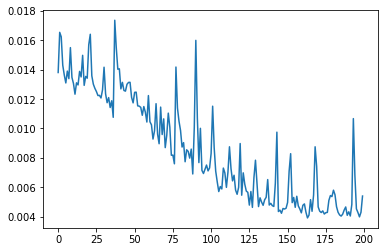

In [42]:
plt.plot(h.history['loss'])
plt.show()

In [43]:
pred_count = 20

In [44]:
x_test = ds_test[:,:window_size,:]
y_test = ds_test[:, window_size,:]

seq_in = x_test[0,:,:]
seq_in = seq_in.tolist()
seq_out = x_test[0,:,:].tolist()


for i in range(pred_count):
    sample_in = np.array(seq_in)
    sample_in = np.reshape(sample_in, (1,window_size,3))
    pred_out = model.predict(sample_in)
    seq_out.append(pred_out[0].tolist())
    seq_in.append(pred_out[0].tolist())
    seq_in.pop(0)

seq_out = np.array(seq_out)

In [45]:
print(seq_out)

[[ 7.72727273e-01  0.00000000e+00  0.00000000e+00]
 [ 7.95454545e-01  0.00000000e+00  0.00000000e+00]
 [ 7.72727273e-01  0.00000000e+00  0.00000000e+00]
 [ 7.95454545e-01  0.00000000e+00  0.00000000e+00]
 [ 8.40909091e-01  0.00000000e+00  0.00000000e+00]
 [ 8.40909091e-01  0.00000000e+00  0.00000000e+00]
 [ 8.18181818e-01  0.00000000e+00  0.00000000e+00]
 [ 7.95454545e-01  0.00000000e+00  0.00000000e+00]
 [ 7.95454545e-01  0.00000000e+00  0.00000000e+00]
 [ 7.95454545e-01  0.00000000e+00  0.00000000e+00]
 [ 7.95454545e-01  0.00000000e+00  0.00000000e+00]
 [ 7.95454545e-01  0.00000000e+00  0.00000000e+00]
 [ 8.18181818e-01  0.00000000e+00  0.00000000e+00]
 [ 7.95454545e-01  0.00000000e+00  0.00000000e+00]
 [ 7.95454545e-01  0.00000000e+00  0.00000000e+00]
 [ 7.95454545e-01  0.00000000e+00  0.00000000e+00]
 [ 7.95454545e-01  0.00000000e+00  0.00000000e+00]
 [ 7.95454545e-01  0.00000000e+00  0.00000000e+00]
 [ 7.95454545e-01  0.00000000e+00  0.00000000e+00]
 [ 7.71318913e-01  1.45630702e-

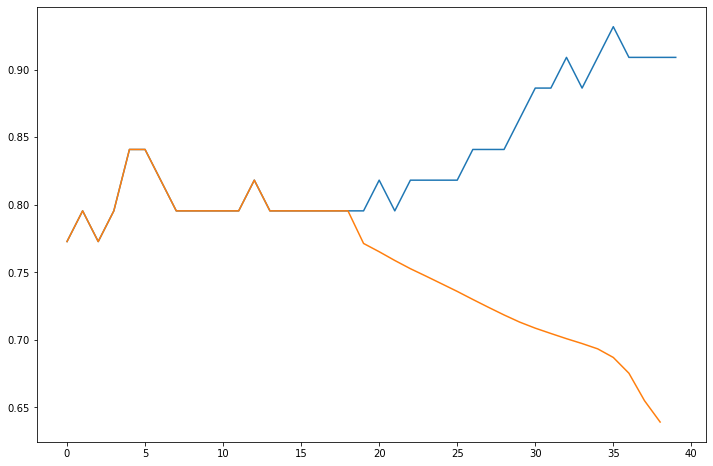

In [46]:
plt.figure(figsize=(12,8))
plt.plot(x_test[:,0,0])
plt.plot(seq_out[:,0])
plt.show()

In [47]:
error1 = error_rate(x_test, seq_out, 20, 20)
print(error1)

num 0 [ 3.03419386 81.69214027 99.38190203] actual 0.7954545454545459 prediction [0.77131891 0.1456307  0.00491669]
num 1 [ 6.47540026 81.86011397 99.25885235] actual 0.8181818181818183 prediction [0.76520127 0.14841725 0.00606394]
num 2 [ 4.61774485 81.3823826  99.18281931] actual 0.7954545454545459 prediction [0.75872248 0.14809468 0.0065003 ]
num 3 [ 8.01168548 81.7464605  99.18396345] actual 0.8181818181818183 prediction [0.75263166 0.14934714 0.00667666]
num 4 [ 8.68583322 81.69431438 99.19022355] actual 0.8181818181818183 prediction [0.74711591 0.14977379 0.00662544]
num 5 [ 9.37446356 81.88843081 99.21557653] actual 0.8181818181818183 prediction [0.74148166 0.14818557 0.00641801]
num 6 [10.06613175 82.23923693 99.24676902] actual 0.8181818181818183 prediction [0.73582256 0.14531533 0.0061628 ]
num 7 [13.20582274 83.25641655 99.3076412 ] actual 0.8409090909090908 prediction [0.72986013 0.14079832 0.00582211]
num 8 [13.89714834 83.83780718 99.35002505] actual 0.8409090909090908 pr

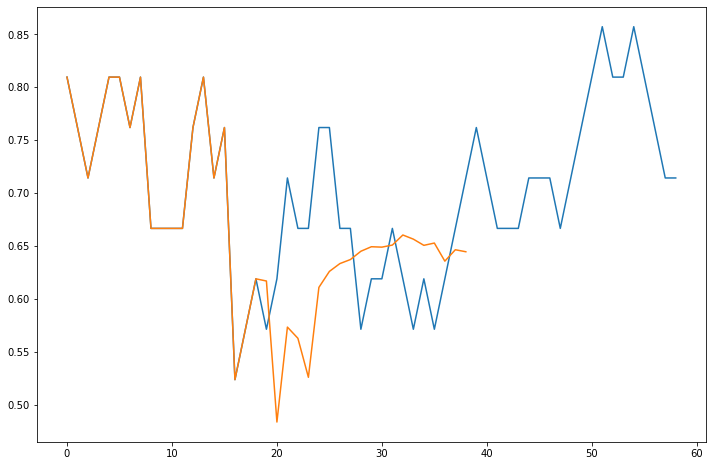

num 0 [  7.97146112 143.48393343 103.76926973] actual 0.5714285714285712 prediction [ 0.61697978 -0.24847962 -0.02153868]
num 1 [ 21.84683153 199.40782327 103.98677943] actual 0.6190476190476186 prediction [ 0.48380533  1.853477   -0.02468006]
num 2 [ 19.71708775  30.8904326  101.1821265 ] actual 0.7142857142857135 prediction [ 0.57344937  0.49363977 -0.00844376]
num 3 [ 15.56954086 133.36688802 105.1199872 ] actual 0.6666666666666661 prediction [ 0.56286973 -0.22244592 -0.03413325]
num 4 [ 21.09254003  77.60656476 103.9578964 ] actual 0.6666666666666661 prediction [ 0.52604973  1.18404377 -0.02638598]
num 5 [ 19.81255524  90.23894574 101.9879783 ] actual 0.7619047619047628 prediction [ 0.61095196  0.07436994 -0.0151465 ]
num 6 [ 17.83168912 109.75351082 103.45324869] actual 0.7619047619047628 prediction [ 0.62604427 -0.07431246 -0.02631047]
num 7 [  4.98486459  89.48671296 102.5325018 ] actual 0.6666666666666661 prediction [ 0.63343424  0.07008858 -0.01688335]
num 8 [  4.4146806   94.

In [48]:
test_df = pd.read_csv('testset/J0003_0024_0221_20110307012732_cell_03.csv', encoding='utf8')

x_test2 = test_df.loc[:,['Resistance', 'Volt', 'Temp']]

x_test2 = pd.DataFrame(x_test2)
x_test2.columns = scale_cols
x_test2 = scaler.fit_transform(x_test2)
x_test2 = pd.DataFrame(x_test2)

ds_test2 = make_dataset(x_test2, window_size)


x_test = ds_test2[:,:window_size,:]
y_test = ds_test2[:, window_size,:]

seq_in = x_test[180,:,:]
seq_in = seq_in.tolist()
seq_out = x_test[180,:,:].tolist()


for i in range(pred_count):
    sample_in = np.array(seq_in)
    sample_in = np.reshape(sample_in, (1,window_size,3))
    pred_out = model.predict(sample_in)
    seq_out.append(pred_out[0].tolist())
    seq_in.append(pred_out[0].tolist())
    seq_in.pop(0)

seq_out = np.array(seq_out)

plt.figure(figsize=(12,8))
plt.plot(x_test[180:,0,0])
plt.plot(seq_out[:,0])
plt.show()

error1 = error_rate(x_test[180:], seq_out, 20, 20)
print(error1)

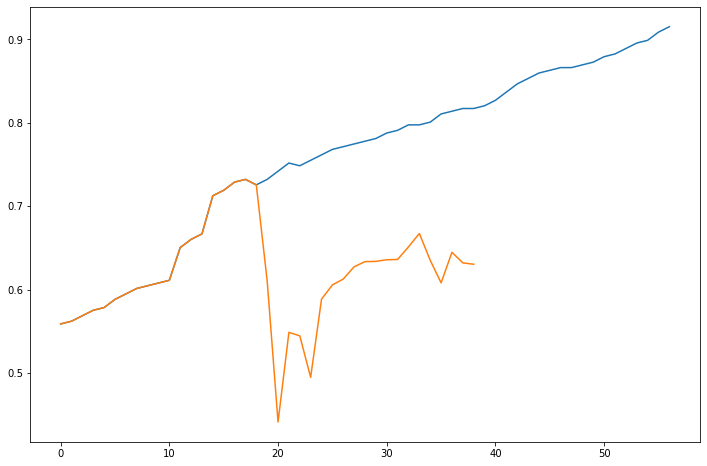

num 0 [ 16.59845987 145.09990481 103.3258667 ] actual 0.7320261437908495 prediction [ 0.61052108 -0.33014309 -0.02434621]
num 1 [ 40.51767842 164.89959225 104.67214124] actual 0.7418300653594769 prediction [ 0.44125775  1.96510482 -0.03465935]
num 2 [ 26.99870581   2.04958423 100.37030854] actual 0.7516339869281043 prediction [ 0.54870254  0.76703936 -0.00278336]
num 3 [ 27.2339431  130.84980121 104.49583064] actual 0.7483660130718952 prediction [ 0.54455644 -0.23086943 -0.03364527]
num 4 [ 34.44696378  63.48184332 104.11442712] actual 0.7549019607843137 prediction [ 0.49486116  1.23412764 -0.03105989]
num 5 [ 22.71152883  68.37207912 101.3791682 ] actual 0.761437908496732 prediction [ 0.58850372  0.24082698 -0.01050151]
num 6 [ 21.15032044 105.75651453 103.41623151] actual 0.7679738562091503 prediction [ 0.60554492 -0.04420853 -0.02623576]
num 7 [ 20.5700592   70.43266847 102.52782571] actual 0.7712418300653594 prediction [ 0.61259693  0.22803563 -0.01949565]
num 8 [ 19.00148377  93.0

In [49]:
test_df = pd.read_csv('testset/J0003_0024_0221_20110307012732_cell_06.csv', encoding='utf8')

x_test2 = test_df.loc[:,['Resistance', 'Volt', 'Temp']]

x_test2 = pd.DataFrame(x_test2)
x_test2.columns = scale_cols
x_test2 = scaler.fit_transform(x_test2)
x_test2 = pd.DataFrame(x_test2)

ds_test2 = make_dataset(x_test2, window_size)


x_test = ds_test2[:,:window_size,:]
y_test = ds_test2[:, window_size,:]

seq_in = x_test[180,:,:]
seq_in = seq_in.tolist()
seq_out = x_test[180,:,:].tolist()


for i in range(pred_count):
    sample_in = np.array(seq_in)
    sample_in = np.reshape(sample_in, (1,window_size,3))
    pred_out = model.predict(sample_in)
    seq_out.append(pred_out[0].tolist())
    seq_in.append(pred_out[0].tolist())
    seq_in.pop(0)

seq_out = np.array(seq_out)

plt.figure(figsize=(12,8))
plt.plot(x_test[180:,0,0])
plt.plot(seq_out[:,0])
plt.show()

error1 = error_rate(x_test[180:], seq_out, 20, 20)
print(error1)

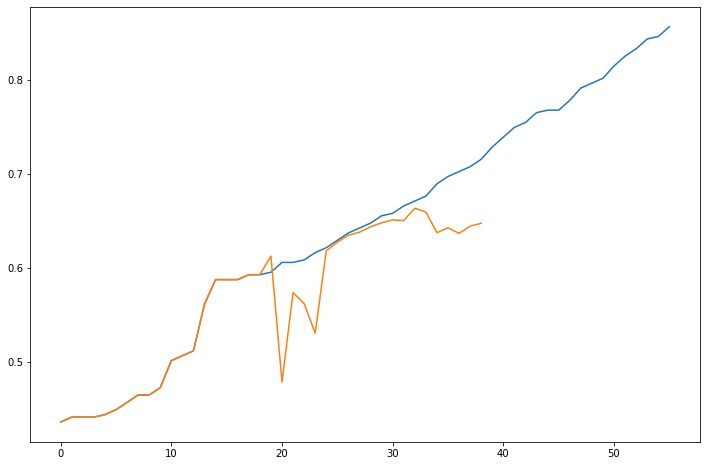

num 0 [  2.89665565 143.59604761 103.6483367 ] actual 0.5953002610966058 prediction [ 0.61254406 -0.25952739 -0.02171856]
num 1 [ 20.99688099 204.51883756 104.18283587] actual 0.6057441253263709 prediction [ 0.47855675  1.84460497 -0.02533728]
num 2 [  5.29305234  16.52557909 101.49065593] actual 0.6057441253263709 prediction [ 0.57368177  0.5056414  -0.00902956]
num 3 [  7.62294037 125.63585486 105.35913567] actual 0.608355091383812 prediction [ 0.56198055 -0.15595703 -0.03260257]
num 4 [ 13.88915891  66.75419883 104.19515221] actual 0.616187989556136 prediction [ 0.53060466  1.02751935 -0.02585002]
num 5 [  0.53863438  94.20205411 102.65976445] actual 0.6214099216710185 prediction [ 0.61806279  0.03602901 -0.01652804]
num 6 [  0.32385044 106.37921668 103.96797467] actual 0.6292428198433422 prediction [ 0.62720501 -0.04014076 -0.0249682 ]
num 7 [  0.37234843  87.75152127 102.52146303] actual 0.6370757180156659 prediction [ 0.63470358  0.07803208 -0.01606363]
num 8 [  0.69186753  95.00

In [50]:
test_df = pd.read_csv('testset/J0003_0024_0221_20110307012732_cell_7.csv', encoding='utf8')

x_test2 = test_df.loc[:,['Resistance', 'Volt', 'Temp']]

x_test2 = pd.DataFrame(x_test2)
x_test2.columns = scale_cols
x_test2 = scaler.fit_transform(x_test2)
x_test2 = pd.DataFrame(x_test2)

ds_test2 = make_dataset(x_test2, window_size)


x_test = ds_test2[:,:window_size,:]
y_test = ds_test2[:, window_size,:]

seq_in = x_test[180,:,:]
seq_in = seq_in.tolist()
seq_out = x_test[180,:,:].tolist()


for i in range(pred_count):
    sample_in = np.array(seq_in)
    sample_in = np.reshape(sample_in, (1,window_size,3))
    pred_out = model.predict(sample_in)
    seq_out.append(pred_out[0].tolist())
    seq_in.append(pred_out[0].tolist())
    seq_in.pop(0)

seq_out = np.array(seq_out)

plt.figure(figsize=(12,8))
plt.plot(x_test[180:,0,0])
plt.plot(seq_out[:,0])
plt.show()

error1 = error_rate(x_test[180:], seq_out, 20, 20)
print(error1)

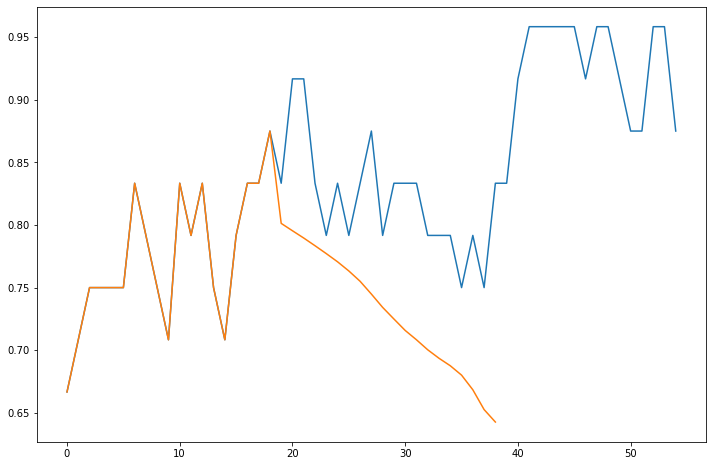

num 0 [ 3.84685516 79.82726157 99.24874879] actual 0.8333333333333339 prediction [0.80127621 0.16810615 0.00626043]
num 1 [13.23096102 80.66589941 99.1925731 ] actual 0.9166666666666661 prediction [0.79538286 0.17722926 0.00740141]
num 2 [13.8646646  80.30790253 99.14282787] actual 0.9166666666666661 prediction [0.78957391 0.18051089 0.00785741]
num 3 [ 5.98730087 78.39264631 99.05652281] actual 0.8333333333333339 prediction [0.78343916 0.18006128 0.00786231]
num 4 [ 1.83530607 77.82272414 99.05187005] actual 0.7916666666666661 prediction [0.77713716 0.1755701  0.00750603]
num 5 [ 7.52801895 79.63465035 99.15353775] actual 0.8333333333333339 prediction [0.77059984 0.16971125 0.00705385]
num 6 [ 3.58502488 79.28922239 99.16361747] actual 0.7916666666666661 prediction [0.76328522 0.16396032 0.00662136]
num 7 [ 9.39546585 81.18761539 99.26884558] actual 0.8333333333333339 prediction [0.75503778 0.15676987 0.00609295]
num 8 [14.87591607 83.23068619 99.37575768] actual 0.875 prediction [0.7

In [51]:
test_df = pd.read_csv('testset/J0003_0024_0221_20110307012732_cell_9.csv', encoding='utf8')

x_test2 = test_df.loc[:,['Resistance', 'Volt', 'Temp']]

x_test2 = pd.DataFrame(x_test2)
x_test2.columns = scale_cols
x_test2 = scaler.fit_transform(x_test2)
x_test2 = pd.DataFrame(x_test2)

ds_test2 = make_dataset(x_test2, window_size)


x_test = ds_test2[:,:window_size,:]
y_test = ds_test2[:, window_size,:]

seq_in = x_test[180,:,:]
seq_in = seq_in.tolist()
seq_out = x_test[180,:,:].tolist()


for i in range(pred_count):
    sample_in = np.array(seq_in)
    sample_in = np.reshape(sample_in, (1,window_size,3))
    pred_out = model.predict(sample_in)
    seq_out.append(pred_out[0].tolist())
    seq_in.append(pred_out[0].tolist())
    seq_in.pop(0)

seq_out = np.array(seq_out)

plt.figure(figsize=(12,8))
plt.plot(x_test[180:,0,0])
plt.plot(seq_out[:,0])
plt.show()

error1 = error_rate(x_test[180:], seq_out, 20, 20)
print(error1)

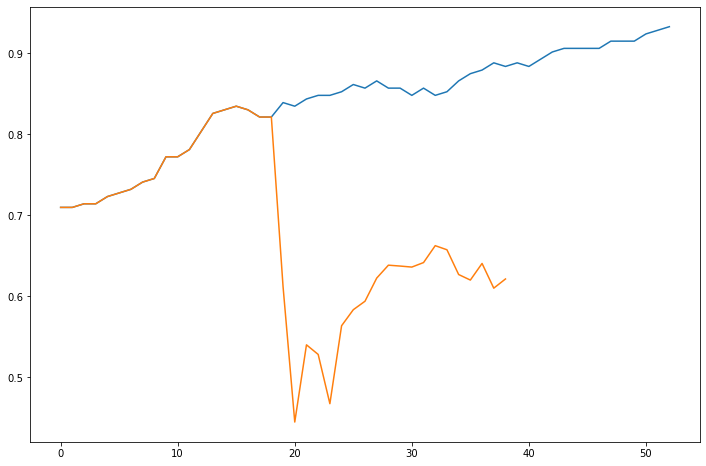

num 0 [ 27.08847979 138.85936737 102.88759454] actual 0.839285714285714 prediction [ 0.61193597 -0.32614112 -0.02423517]
num 1 [ 46.72955192 157.49216743 103.87158394] actual 0.8348214285714284 prediction [ 0.44471312  2.14959979 -0.03232081]
num 2 [ 35.99103292  18.11524144 100.48166657] actual 0.84375 prediction [ 0.54007566  0.69090265 -0.00406406]
num 3 [ 37.72661912 140.19121572 104.50819994] actual 0.8482142857142856 prediction [ 0.52821171 -0.34090763 -0.0382392 ]
num 4 [ 44.89894967  90.38010045 104.04893455] actual 0.8482142857142856 prediction [ 0.46737498  1.61483121 -0.03434364]
num 5 [ 33.8971862   72.32553272 101.20457244] actual 0.8526785714285712 prediction [ 0.56364453  0.23597425 -0.01027113]
num 6 [ 32.28451032 118.6745992  103.74575915] actual 0.8616071428571428 prediction [ 0.5834415  -0.16090168 -0.03227373]
num 7 [ 30.70951502  57.04854131 102.46118071] actual 0.8571428571428568 prediction [ 0.59391844  0.36815536 -0.02109583]
num 8 [ 28.12252733  88.83156481 101

In [52]:
test_df = pd.read_csv('testset/J0003_0024_0221_20110307012732_cell_18.csv', encoding='utf8')

x_test2 = test_df.loc[:,['Resistance', 'Volt', 'Temp']]

x_test2 = pd.DataFrame(x_test2)
x_test2.columns = scale_cols
x_test2 = scaler.fit_transform(x_test2)
x_test2 = pd.DataFrame(x_test2)

ds_test2 = make_dataset(x_test2, window_size)


x_test = ds_test2[:,:window_size,:]
y_test = ds_test2[:, window_size,:]

seq_in = x_test[180,:,:]
seq_in = seq_in.tolist()
seq_out = x_test[180,:,:].tolist()


for i in range(pred_count):
    sample_in = np.array(seq_in)
    sample_in = np.reshape(sample_in, (1,window_size,3))
    pred_out = model.predict(sample_in)
    seq_out.append(pred_out[0].tolist())
    seq_in.append(pred_out[0].tolist())
    seq_in.pop(0)

seq_out = np.array(seq_out)

plt.figure(figsize=(12,8))
plt.plot(x_test[180:,0,0])
plt.plot(seq_out[:,0])
plt.show()

error1 = error_rate(x_test[180:], seq_out, 20, 20)
print(error1)

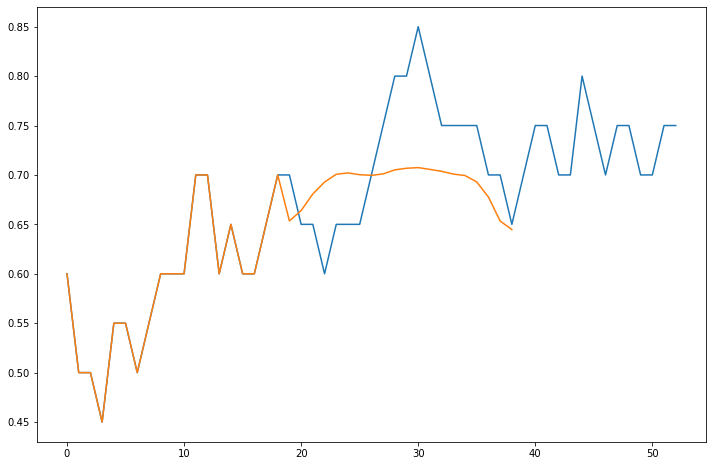

num 0 [ 6.65384701 82.46869871 99.58088688] actual 0.7000000000000011 prediction [0.65342307 0.12271911 0.00293379]
num 1 [ 2.15223753 84.64733821 99.52178581] actual 0.6500000000000004 prediction [0.66398954 0.0997923  0.00310839]
num 2 [ 4.73681413 86.22113696 99.61048802] actual 0.6500000000000004 prediction [0.68078929 0.08956261 0.00253183]
num 3 [15.4649059  84.49623336 99.7205775 ] actual 0.6000000000000014 prediction [0.69278944 0.0930226  0.00167654]
num 4 [ 7.79838379 84.09322248 99.85542061] actual 0.6500000000000004 prediction [0.70068949 0.10339405 0.00093977]
num 5 [ 8.00862312 81.75970064 99.99263489] actual 0.6500000000000004 prediction [7.02056050e-01 1.18561946e-01 4.78732400e-05]
num 6 [  7.73134232  80.62546895 100.08765332] actual 0.6500000000000004 prediction [ 7.00253725e-01  1.25934452e-01 -5.69746597e-04]
num 7 [5.82524708e-02 8.19075125e+01 1.00081085e+02] actual 0.7000000000000011 prediction [ 6.99592233e-01  1.26647413e-01 -5.67594776e-04]
num 8 [  6.5318981

In [53]:
test_df = pd.read_csv('testset/J0003_0024_0221_20110307012732_cell_19.csv', encoding='utf8')

x_test2 = test_df.loc[:,['Resistance', 'Volt', 'Temp']]

x_test2 = pd.DataFrame(x_test2)
x_test2.columns = scale_cols
x_test2 = scaler.fit_transform(x_test2)
x_test2 = pd.DataFrame(x_test2)

ds_test2 = make_dataset(x_test2, window_size)


x_test = ds_test2[:,:window_size,:]
y_test = ds_test2[:, window_size,:]

seq_in = x_test[180,:,:]
seq_in = seq_in.tolist()
seq_out = x_test[180,:,:].tolist()


for i in range(pred_count):
    sample_in = np.array(seq_in)
    sample_in = np.reshape(sample_in, (1,window_size,3))
    pred_out = model.predict(sample_in)
    seq_out.append(pred_out[0].tolist())
    seq_in.append(pred_out[0].tolist())
    seq_in.pop(0)

seq_out = np.array(seq_out)

plt.figure(figsize=(12,8))
plt.plot(x_test[180:,0,0])
plt.plot(seq_out[:,0])
plt.show()

error1 = error_rate(x_test[180:], seq_out, 20, 20)
print(error1)

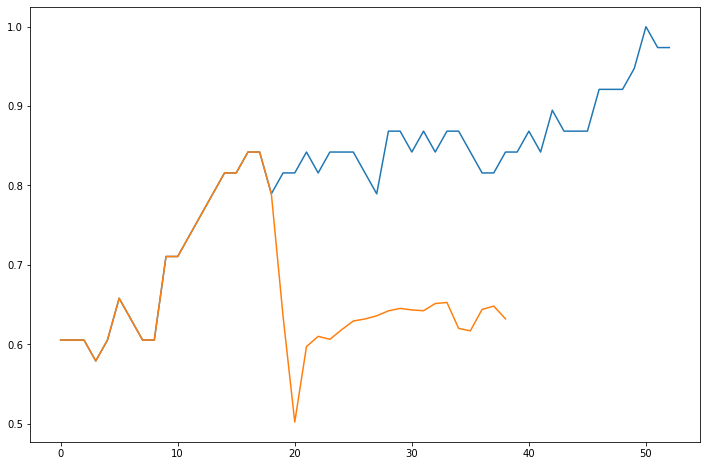

num 0 [ 22.11266025 124.44594435 102.96954539] actual 0.8157894736842097 prediction [ 0.63539672 -0.19942744 -0.02422524]
num 1 [ 38.46222508 108.84743352 104.08940822] actual 0.8157894736842097 prediction [ 0.50201869  1.70375538 -0.03336096]
num 2 [ 29.1058179    5.29763773 100.01139165] actual 0.8421052631578938 prediction [ 5.97003639e-01  7.97493577e-01 -9.59297176e-05]
num 3 [ 25.23401706  82.226249   102.44230955] actual 0.8157894736842097 prediction [ 0.60993302  0.14499639 -0.0199241 ]
num 4 [ 28.01239341  60.60437188 102.5664013 ] actual 0.8421052631578938 prediction [ 0.60621142  0.33175266 -0.0216118 ]
num 5 [ 26.58163607  47.65429087 101.69387329] actual 0.8421052631578938 prediction [ 0.61825991  0.44080597 -0.0142642 ]
num 6 [ 25.27371831  73.50859772 101.59978498] actual 0.8421052631578938 prediction [ 0.62927395  0.22308549 -0.01347187]
num 7 [ 22.54917237  84.79525567 101.91410219] actual 0.8157894736842097 prediction [ 0.6318357   0.1240387  -0.01561504]
num 8 [ 19.4

In [54]:
test_df = pd.read_csv('testset/J0003_0024_0221_20110307012732_cell_20.csv', encoding='utf8')

x_test2 = test_df.loc[:,['Resistance', 'Volt', 'Temp']]

x_test2 = pd.DataFrame(x_test2)
x_test2.columns = scale_cols
x_test2 = scaler.fit_transform(x_test2)
x_test2 = pd.DataFrame(x_test2)

ds_test2 = make_dataset(x_test2, window_size)


x_test = ds_test2[:,:window_size,:]
y_test = ds_test2[:, window_size,:]

seq_in = x_test[180,:,:]
seq_in = seq_in.tolist()
seq_out = x_test[180,:,:].tolist()


for i in range(pred_count):
    sample_in = np.array(seq_in)
    sample_in = np.reshape(sample_in, (1,window_size,3))
    pred_out = model.predict(sample_in)
    seq_out.append(pred_out[0].tolist())
    seq_in.append(pred_out[0].tolist())
    seq_in.pop(0)

seq_out = np.array(seq_out)

plt.figure(figsize=(12,8))
plt.plot(x_test[180:,0,0])
plt.plot(seq_out[:,0])
plt.show()

error1 = error_rate(x_test[180:], seq_out, 20, 20)
print(error1)

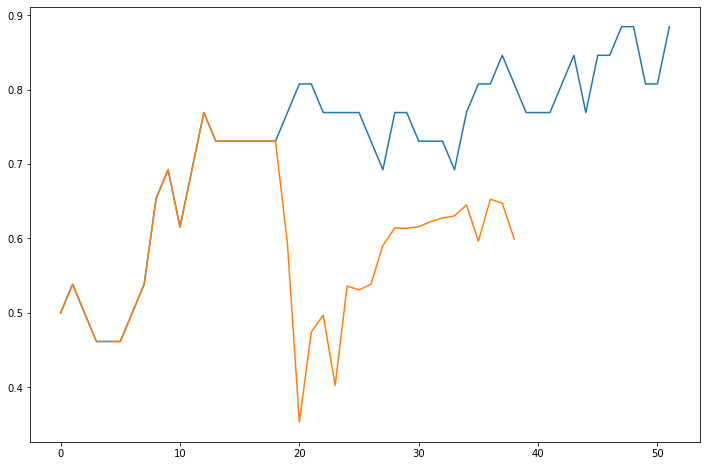

num 0 [ 22.88059473 167.22326815 104.0350898 ] actual 0.76923076923077 prediction [ 0.59322619 -0.51710206 -0.03103915]
num 1 [ 56.2566076  246.91311064 105.99056277] actual 0.8076923076923084 prediction [ 0.35331202  2.80199051 -0.04838531]
num 2 [41.28015779 36.24350911 99.59850903] actual 0.8076923076923084 prediction [0.47427565 1.10042834 0.00324281]
num 3 [ 35.40269107 156.78496122 105.49560864] actual 0.76923076923077 prediction [ 0.49690238 -0.43680739 -0.04227391]
num 4 [ 47.65625179 151.26447201 105.84790617] actual 0.76923076923077 prediction [ 0.40264422  1.93280363 -0.04498389]
num 5 [ 30.31593025  44.78182971 100.14571888] actual 0.76923076923077 prediction [ 0.53603131  0.42475516 -0.00112091]
num 6 [ 30.9821552  113.42752263 104.08355247] actual 0.76923076923077 prediction [ 0.5309065  -0.10328864 -0.03141194]
num 7 [ 26.31095711  14.47057661 103.52943144] actual 0.7307692307692317 prediction [ 0.53849685  0.62502271 -0.025792  ]
num 8 [ 14.6800114   78.52839281 101.779

In [55]:
test_df = pd.read_csv('testset/J0003_0024_0221_20110307012732_cell_22.csv', encoding='utf8')

x_test2 = test_df.loc[:,['Resistance', 'Volt', 'Temp']]

x_test2 = pd.DataFrame(x_test2)
x_test2.columns = scale_cols
x_test2 = scaler.fit_transform(x_test2)
x_test2 = pd.DataFrame(x_test2)

ds_test2 = make_dataset(x_test2, window_size)


x_test = ds_test2[:,:window_size,:]
y_test = ds_test2[:, window_size,:]

seq_in = x_test[180,:,:]
seq_in = seq_in.tolist()
seq_out = x_test[180,:,:].tolist()


for i in range(pred_count):
    sample_in = np.array(seq_in)
    sample_in = np.reshape(sample_in, (1,window_size,3))
    pred_out = model.predict(sample_in)
    seq_out.append(pred_out[0].tolist())
    seq_in.append(pred_out[0].tolist())
    seq_in.pop(0)

seq_out = np.array(seq_out)

plt.figure(figsize=(12,8))
plt.plot(x_test[180:,0,0])
plt.plot(seq_out[:,0])
plt.show()

error1 = error_rate(x_test[180:], seq_out, 20, 20)
print(error1)

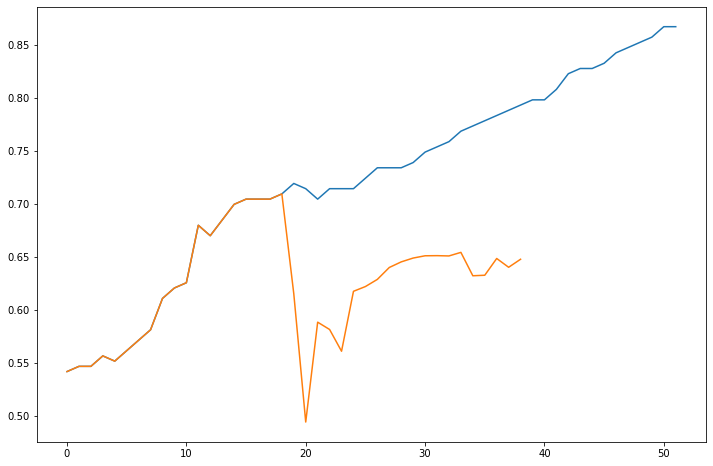

num 0 [ 14.46758051 127.58958718 103.03964732] actual 0.7192118226600983 prediction [ 0.61515927 -0.19842757 -0.0218615 ]
num 1 [ 30.79677641 132.93689013 103.63180954] actual 0.714285714285714 prediction [ 0.49430874  1.66383493 -0.0259415 ]
num 2 [ 16.46551582   7.85422188 100.75562828] actual 0.7044334975369457 prediction [ 0.58844489  0.64910573 -0.0053229 ]
num 3 [ 18.58320832  98.44131112 103.55688892] actual 0.714285714285714 prediction [ 0.58154851  0.01113349 -0.02540635]
num 4 [ 21.4526248   10.77159762 103.16618484] actual 0.714285714285714 prediction [ 0.56105268  0.63734573 -0.02261561]
num 5 [ 13.54352355  82.86780715 102.19612759] actual 0.714285714285714 prediction [ 0.61754626  0.12237281 -0.01568663]
num 6 [ 14.10123365  93.93605952 102.78491067] actual 0.7241379310344827 prediction [ 0.62202555  0.04391129 -0.02016659]
num 7 [ 14.33556628  74.5591212  101.99175598] actual 0.7339901477832509 prediction [ 0.6287685   0.18673354 -0.01461929]
num 8 [ 12.80627247  91.9748

In [56]:
test_df = pd.read_csv('testset/J0003_0024_0221_20110307012732_cell_23.csv', encoding='utf8')

x_test2 = test_df.loc[:,['Resistance', 'Volt', 'Temp']]

x_test2 = pd.DataFrame(x_test2)
x_test2.columns = scale_cols
x_test2 = scaler.fit_transform(x_test2)
x_test2 = pd.DataFrame(x_test2)

ds_test2 = make_dataset(x_test2, window_size)


x_test = ds_test2[:,:window_size,:]
y_test = ds_test2[:, window_size,:]

seq_in = x_test[180,:,:]
seq_in = seq_in.tolist()
seq_out = x_test[180,:,:].tolist()


for i in range(pred_count):
    sample_in = np.array(seq_in)
    sample_in = np.reshape(sample_in, (1,window_size,3))
    pred_out = model.predict(sample_in)
    seq_out.append(pred_out[0].tolist())
    seq_in.append(pred_out[0].tolist())
    seq_in.pop(0)

seq_out = np.array(seq_out)

plt.figure(figsize=(12,8))
plt.plot(x_test[180:,0,0])
plt.plot(seq_out[:,0])
plt.show()

error1 = error_rate(x_test[180:], seq_out, 20, 20)
print(error1)